Every point on this homework must be solved with python code. You will show your code, your results, and make a clear statement of what is you answer. Answer **all** the questions.
1. You will be applying a transformation on a set of points of the following image (18%).
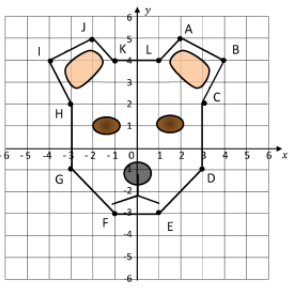
<br>
a) [2%] Find the matrix that represents a rotation of 20 degrees in homogeneous coordinates.<br>
b) [2%] Find the matrix  that represents a translation of 2 in X direction, 1 in y direction degrees in homogeneous coordinates.<br>
c) [2%] Plot the points that form the figure in the cartesian plane.<br>
d) [2%] Perform a rotation of 20 degrees on the points and plot them. <br>
e) [2%] Perform a translation  in x of 2 and a translation in y of 1 over the points previously rotated. Plot the new obtained points.<br>
f) [2%] Find a transform that represents the operation of rotation of 20 degrees followed by a translation. Compare with the points on e) and verify with a plot the match.<br>
g) [2%] Defines a matrix that represents a translation of 2 in x and a translation of 1 in y, followed by a rotation of 20 degrees. Do the transformation over the initial set of points and compare them.<br>
h) [2%] Are the matrices obtained in g) and f) the same? Why? Justify your answer.<br>
i) [2%] Compute the inverse matrix of the transformation obtained in g). Apply such transformation over the set of points obtained in g). Do the new points match the original points? show plots to verify it.<br>



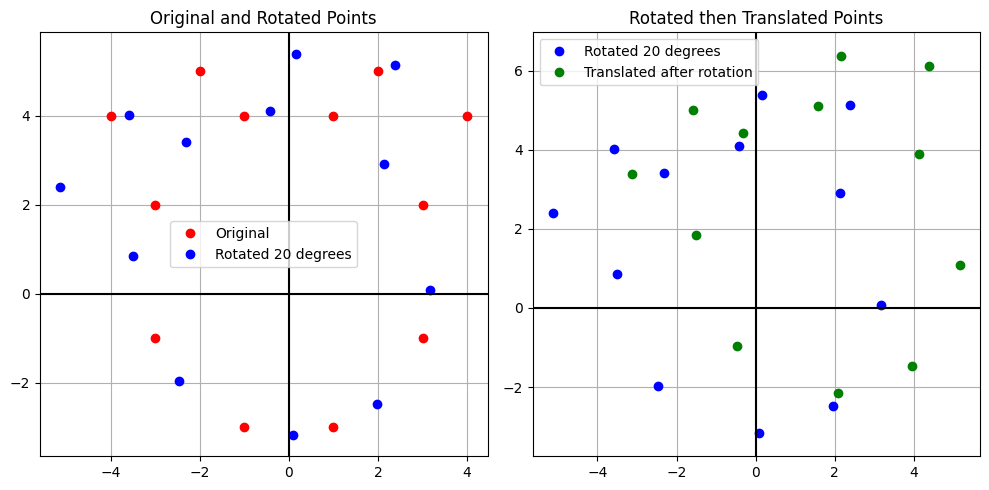

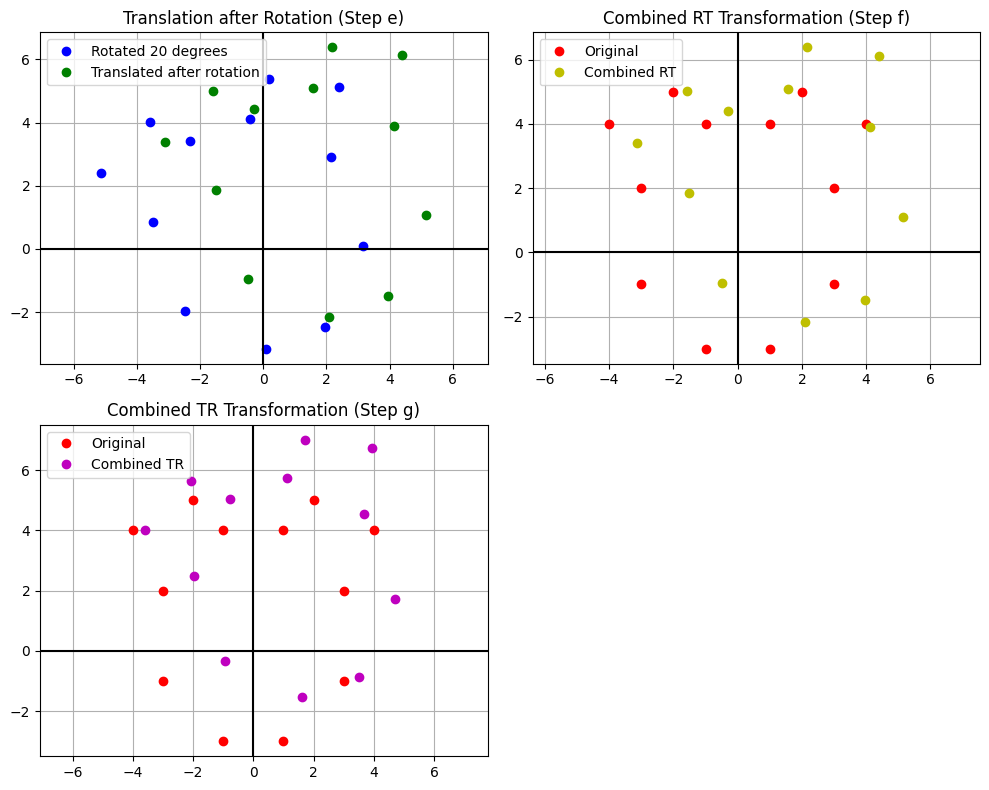

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Rotation angle
theta_deg = 20
theta_rad = np.pi * theta_deg / 180

# Rotation matrix
R = np.array([
    [np.cos(theta_rad), -np.sin(theta_rad), 0],
    [np.sin(theta_rad), np.cos(theta_rad), 0],
    [0, 0, 1]
])

# Translation values
tx, ty = 2, 1

# Translation matrix
T = np.array([
    [1, 0, tx],
    [0, 1, ty],
    [0, 0, 1]
])

# Define points as homogeneous coordinates
points = np.array([
    [2, 5, 1], [4, 4, 1], [3, 2, 1], [3, -1, 1], [1, -3, 1], [-1, -3, 1],
    [-3, -1, 1], [-3, 2, 1], [-4, 4, 1], [-2, 5, 1], [-1, 4, 1], [1, 4, 1]
])

# Transpose points for easier manipulation
points_transposed = points.T

# Apply rotation
rotated_points = R @ points_transposed

# Set up plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(points_transposed[0, :], points_transposed[1, :], 'ro', label='Original')
plt.plot(rotated_points[0, :], rotated_points[1, :], 'bo', label='Rotated 20 degrees')
plt.title('Original and Rotated Points')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.grid(True)
plt.legend()
plt.axis('equal')

# Apply translation to rotated points
translated_rotated_points = T @ rotated_points

# Plot the translated + rotated points
plt.subplot(1, 2, 2)
plt.plot(rotated_points[0, :], rotated_points[1, :], 'bo', label='Rotated 20 degrees')
plt.plot(translated_rotated_points[0, :], translated_rotated_points[1, :], 'go', label='Translated after rotation')
plt.title('Rotated then Translated Points')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.grid(True)
plt.legend()
plt.axis('equal')

plt.tight_layout()
plt.show()

# Step e: Perform the combined translation on the rotated points
translated_rotated_points_step_e = T @ rotated_points

# Step f: Combine rotation and translation into one matrix (R followed by T)
combined_RT = T @ R

# Apply the combined transformation to the original points
combined_transformed_points = combined_RT @ points_transposed

# Step g: Define a matrix for translation followed by rotation
combined_TR = R @ T

# Apply this new combined transformation to the original points
combined_transformed_points_g = combined_TR @ points_transposed

# Set up plot for comparison
plt.figure(figsize=(10, 8))

# Plot for step e: Translated after Rotation
plt.subplot(2, 2, 1)
plt.plot(rotated_points[0, :], rotated_points[1, :], 'bo', label='Rotated 20 degrees')
plt.plot(translated_rotated_points_step_e[0, :], translated_rotated_points_step_e[1, :], 'go', label='Translated after rotation')
plt.title('Translation after Rotation (Step e)')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.grid(True)
plt.legend()
plt.axis('equal')

# Plot for step f: Rotation then Translation combined
plt.subplot(2, 2, 2)
plt.plot(points_transposed[0, :], points_transposed[1, :], 'ro', label='Original')
plt.plot(combined_transformed_points[0, :], combined_transformed_points[1, :], 'yo', label='Combined RT')
plt.title('Combined RT Transformation (Step f)')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.grid(True)
plt.legend()
plt.axis('equal')

# Plot for step g: Translation then Rotation combined
plt.subplot(2, 2, 3)
plt.plot(points_transposed[0, :], points_transposed[1, :], 'ro', label='Original')
plt.plot(combined_transformed_points_g[0, :], combined_transformed_points_g[1, :], 'mo', label='Combined TR')
plt.title('Combined TR Transformation (Step g)')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.grid(True)
plt.legend()
plt.axis('equal')

plt.tight_layout()
plt.show()





2. In this point you will be doing forward warping of an image and will be implementing a nearest neighbor interpolation on the following image. (Available [here](http://www.cs.ucf.edu/~gvaca/teaching/CAP4453-Fall2021/homeworks/hw5/) )<br>
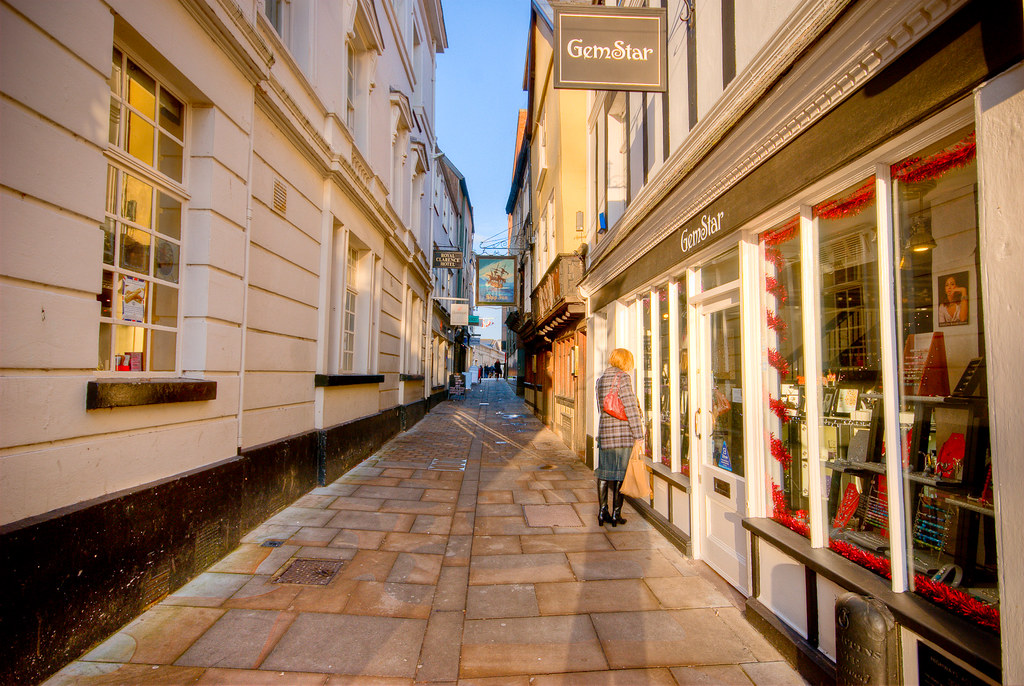
a) [10%] Implement forward warping of the grid points for the homography matrix: <br>
H=[[-2.90978069e+00,  3.54859237e-02,  1.70029144e+03],<br>
  [-6.48857919e-01, -8.36844934e-01,  6.24249500e+02],<br>
 [-2.10617311e-03,  8.27414761e-06,  1.00000000e+00]]<br>
 <br>
 b) [2%]Visualize the obtained warped image in the range from 0 to 1000 in x and y.<br>
 c) [2%]comment about the appereance of the image. Does the image have gaps?<br>
 d) [5%] How the warping looks in regions where outside the [0-1000 pixels in x,y]<br>
 e) [10%] Implement a forward  nearest neighbor interpolation in the warped image<br>
 f) [3%]Visualize the interpolated image. <br>
 g) [2%] comment about the appereance of the interpolated image versus the initially warped image.



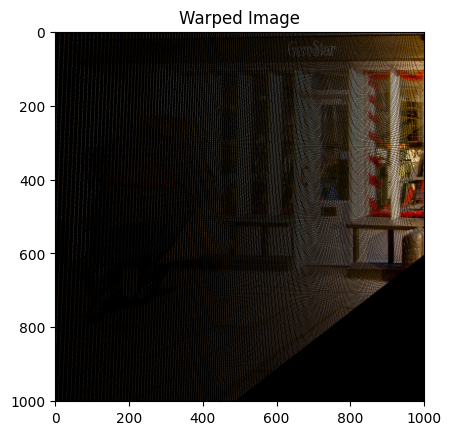

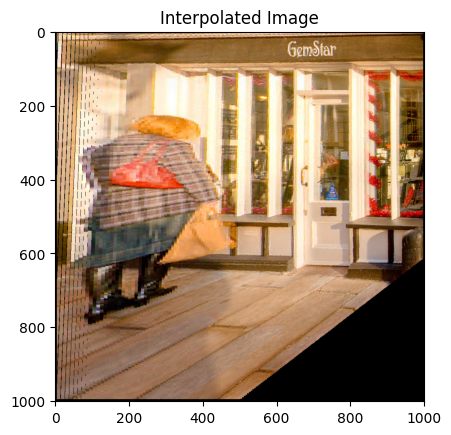

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Load the image
url = "http://www.cs.ucf.edu/~gvaca/teaching/CAP4453-Fall2021/homeworks/hw5/img2warp.jpg"
img = io.imread(url)

# Define coordinates and grid
i = np.linspace(0, img.shape[0]-1, img.shape[0]).astype(int)
j = np.linspace(0, img.shape[1]-1, img.shape[1]).astype(int)
yv, xv = np.meshgrid(i, j)
numpoints = xv.ravel().shape[0]

# Extract color channels
r = img[yv.ravel(), xv.ravel(), 0]
g = img[yv.ravel(), xv.ravel(), 1]
b = img[yv.ravel(), xv.ravel(), 2]

# Define the Homography matrix
H = np.array([
    [-2.90978069, 0.03548592, 1700.29144],
    [-0.64885792, -0.83684493, 624.2495],
    [-0.00210617, 0.00000827, 1.0]
])

# Create grid in homogeneous coordinates
grid = np.vstack([xv.ravel(), yv.ravel(), np.ones(numpoints)])

# Step a: Apply homography
newgrid = H @ grid

# Step b: Convert from homogeneous to Cartesian coordinates
newgrid_cart = newgrid[:2] / newgrid[2]

# Step c: Define your new empty canvas
warped = -np.ones((1001, 1001, 3), dtype=np.int16)

# Step d: Round to nearest integer coordinates and validate within range
newgrid_round = newgrid_cart.round().astype(int)
valid_x = (newgrid_round[0] >= 0) & (newgrid_round[0] < 1000)
valid_y = (newgrid_round[1] >= 0) & (newgrid_round[1] < 1000)
valids = valid_x & valid_y

# Step e: Assign colors to valid points
warped[newgrid_round[1, valids], newgrid_round[0, valids], 0] = r[valids]
warped[newgrid_round[1, valids], newgrid_round[0, valids], 1] = g[valids]
warped[newgrid_round[1, valids], newgrid_round[0, valids], 2] = b[valids]

# Step f: Visualize the warped image
plt.imshow(warped.clip(0, 255))
plt.title('Warped Image')
plt.show()

# Step g: Implement forward nearest neighbor interpolation
warped2 = np.zeros((1001, 1001, 3), dtype=np.uint8)
area2check = 5

# Step h: Loop over the valid area of the warped image
for i in range(area2check, warped.shape[0] - area2check):
    for j in range(area2check, warped.shape[1] - area2check):
        # Check if the pixel has a valid warped value
        if warped[i, j, 0] == -1:  # need to look for neighbor
            distance = area2check * area2check + 1  # assign a large initial distance

            # Loop over all the possible neighbors
            for k in range(i - area2check, i + area2check):
                for l in range(j - area2check, j + area2check):
                    distancetested = abs(k - i) + abs(l - j)  # L1 distance
                    if warped[k, l, 0] >= 0 and distancetested < distance:  # found a closer valid point
                        distance = distancetested
                        warped2[i, j] = warped[k, l]
        else:  # Assign the valid warping directly
            warped2[i, j] = warped[i, j]

# Step i: Visualize the interpolated image
plt.imshow(warped2)
plt.title('Interpolated Image')
plt.show()




3. Write a function of the form (10%):



>> imwarped = warpImage(im,H,limit_coordinates)



where im is the input image to be warped, H is the homography, and limit_coordinates defines the limits (xmin,xmax,ymin,ymax) of the warped image.  


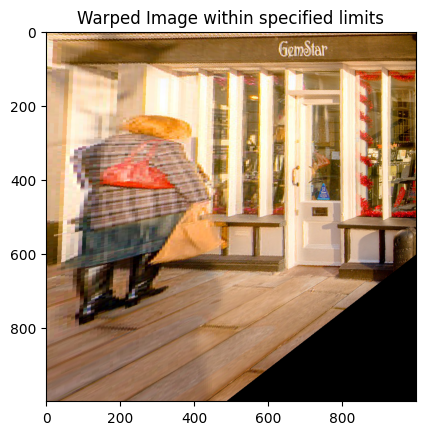

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

def warpImage(im, H, limit_coordinates):
    """
    Warps the input image using the provided homography matrix within specified limits.

    Args:
    im (ndarray): Input image.
    H (ndarray): Homography matrix.
    limit_coordinates (tuple): Limits (xmin, xmax, ymin, ymax) of the output image.

    Returns:
    ndarray: Warped image.
    """
    xmin, xmax, ymin, ymax = limit_coordinates

    # Define the range of coordinates in the output image
    x_range = np.arange(xmin, xmax)
    y_range = np.arange(ymin, ymax)
    xv, yv = np.meshgrid(x_range, y_range)

    # Flatten the coordinates to create vectors
    numpoints = xv.ravel().shape[0]
    grid = np.vstack([xv.ravel(), yv.ravel(), np.ones(numpoints)])

    # Apply the inverse homography matrix (since we're doing forward warping)
    H_inv = np.linalg.inv(H)
    newgrid = H_inv @ grid

    # Normalize to Cartesian coordinates
    newgrid_cart = newgrid[:2] / newgrid[2]

    # Prepare the new empty canvas
    imwarped = np.zeros((ymax - ymin, xmax - xmin, 3), dtype=np.uint8)

    # Round to nearest integer coordinates for source image
    newgrid_round = newgrid_cart.round().astype(int)

    # Validate coordinates within the source image range
    valid_x = (newgrid_round[0] >= 0) & (newgrid_round[0] < im.shape[1])
    valid_y = (newgrid_round[1] >= 0) & (newgrid_round[1] < im.shape[0])
    valids = valid_x & valid_y

    # Map valid points to the warped image
    valid_indices = np.where(valids)
    source_y = newgrid_round[1, valid_indices].clip(0, im.shape[0] - 1)
    source_x = newgrid_round[0, valid_indices].clip(0, im.shape[1] - 1)
    target_y = yv.ravel()[valid_indices].clip(ymin, ymax - 1) - ymin
    target_x = xv.ravel()[valid_indices].clip(xmin, xmax - 1) - xmin

    # Assign the pixel values
    imwarped[target_y, target_x] = im[source_y, source_x]

    return imwarped

# Example usage:
# Load an image
url = "http://www.cs.ucf.edu/~gvaca/teaching/CAP4453-Fall2021/homeworks/hw5/img2warp.jpg"
im = io.imread(url)

# Define a homography matrix
H = np.array([
    [-2.90978069, 0.03548592, 1700.29144],
    [-0.64885792, -0.83684493, 624.2495],
    [-0.00210617, 0.00000827, 1.0]
])

# Define limit coordinates
limit_coordinates = (0, 1000, 0, 1000)  # (xmin, xmax, ymin, ymax)

# Warp the image
imwarped = warpImage(im, H, limit_coordinates)

# Visualize the warped image
plt.imshow(imwarped)
plt.title('Warped Image within specified limits')
plt.show()


<br>

4. **Recover Homographies (10%)**.  Before you can warp your images into alignment, you need to recover the parameters of the transformation between each pair of images.  
In our case, the transformation is a homography: $p’=Hp$,
where:
* $(p’,p)$ are pairs of corresponding points taken from the two images.  
* $H$ is a 3x3 matrix with 8 degrees of freedom (lower right corner is a scaling factor and can be set to 1;  $h_{2,2}  = 1$). <br>

Considering the matrix form below, <b>obtain an expression of the form $Ax=b$ if $h_{22} =1$ </b><br>

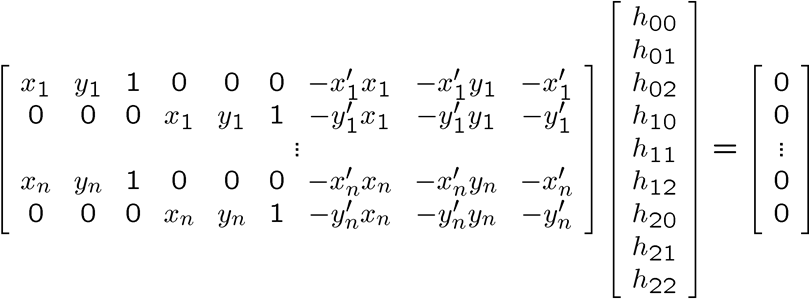
<br>
<b>Tip: if $h_{2,2}$ is 1, you can have 1 parameter less in the h vector and 1 column less in the matrix; b will not be zero anymore</b>
<br>
<br>
5. Write a python function using the expression obtained in the previous point with the following prototype (10%): <br>

>> H = computeH(im1_pts,im2_pts) <br>

> where im1_pts and im2_pts are n-by-2 matrices holding the (x,y) locations of n point correspondences from the two images and H is the recovered 3x3 homography matrix.  <br>
<br>






6. Test your functions. Select 4 points manually from the image in point 2. The cooresponding points will be your corner points in the new warped image (origin, top right, bottom right, bottom left). <br>
a) Compute a new homography matrix using function created in 5. (10%).<br>
b) Visualize the warped image using the function created in 3. (8%).<br>
<br>

**BONUS [50%] Stackable with other homeworks if your score overpass 100%**:
Write a function of the form:


>> imwarped = warpImage(im1,im2,H)



where im1 and im2 are the input images to be warped and H is the homography that wrap im1 to im2.  

Use the method described in class. you need forward and inverse warping (but remember that for inverse warping you will need to compute H in the right “direction”).

Try to write the whole function without any loops. One thing you need to pay attention to is the size of the resulting image (you can predict the bounding box by piping the four corners of the image through H, or use extra input parameters).  Also pay attention to how you mark pixels which don’t have any values.

Utilizes bilinear interpolation to approximate non integer pixel positions.



## Question 4

In [26]:
# Question 4
import numpy as np

def recover_homography(pts1, pts2):
    """
    Computes the homography matrix H such that pts2 = H * pts1.

    Args:
        pts1 (numpy.ndarray): Array of points in the first image, shape (n, 2).
        pts2 (numpy.ndarray): Array of corresponding points in the second image, shape (n, 2).

    Returns:
        numpy.ndarray: The 3x3 homography matrix.
    """
    n = pts1.shape[0]
    A = np.zeros((2 * n, 9))

    for i in range(n):
        x1, y1 = pts1[i]
        x2, y2 = pts2[i]
        A[2*i] = [-x1, -y1, -1, 0, 0, 0, x2*x1, x2*y1, x2]
        A[2*i + 1] = [0, 0, 0, -x1, -y1, -1, y2*x1, y2*y1, y2]

    # SVD to solve A * h = 0
    U, S, Vt = np.linalg.svd(A)
    h = Vt[-1]  # The last row of Vt (corresponds to the smallest singular value)

    # Reshape h into the 3x3 homography matrix
    H = h.reshape((3, 3))

    return H

# Example usage:
# Define corresponding points
pts1 = np.array([
    [100, 150],
    [200, 150],
    [200, 250],
    [100, 250]
])

pts2 = np.array([
    [120, 155],
    [220, 160],
    [215, 260],
    [110, 255]
])

# Compute the homography matrix
H = recover_homography(pts1, pts2)
print("Homography Matrix:")
print(H)


Homography Matrix:
[[ 2.18832258e-02 -3.31454341e-03  9.21194866e-01]
 [ 1.17120762e-03  1.91323099e-02  3.87300003e-01]
 [ 5.17089456e-07 -1.03417891e-05  2.32690255e-02]]


## Question 5

In [27]:
def computeH(im1_pts, im2_pts):
    n = len(im1_pts)
    A = np.zeros((2 * n, 9))
    for i in range(n):
        x1, y1 = im1_pts[i]
        x2, y2 = im2_pts[i]
        A[2 * i] = [-x1, -y1, -1, 0, 0, 0, x2 * x1, x2 * y1, x2]
        A[2 * i + 1] = [0, 0, 0, -x1, -y1, -1, y2 * x1, y2 * y1, y2]
    U, S, Vt = np.linalg.svd(A)
    h = Vt[-1]
    H = h.reshape(3, 3)
    return H

## Question 6

Homography Matrix:
[[-9.14168280e-02 -4.02028008e-03 -4.19602560e-01]
 [ 1.23426810e-03 -9.50920961e-02 -8.93386574e-01]
 [ 1.24722629e-05 -1.97612478e-05 -9.15253529e-02]]


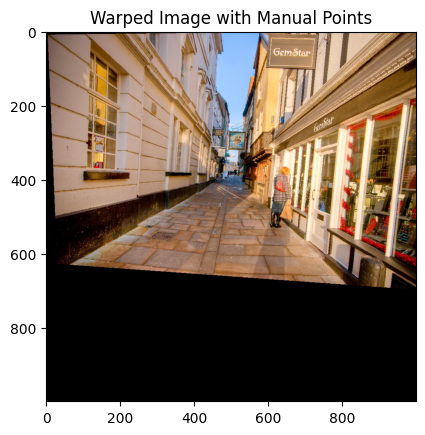

In [28]:
# Manually selected points from the images (for example)
im1_pts = np.array([[10, 10], [200, 50], [100, 200], [300, 300]])
im2_pts = np.array([[15, 20], [210, 60], [110, 210], [310, 310]])

# Compute the homography
H = computeH(im1_pts, im2_pts)

print("Homography Matrix:")
print(H)

# Assuming the warpImage function from Step 3 is already implemented
warped_image = warpImage(im, H, (0, 1000, 0, 1000))

# Display the warped image
plt.imshow(warped_image)
plt.title('Warped Image with Manual Points')
plt.show()


## BONUS

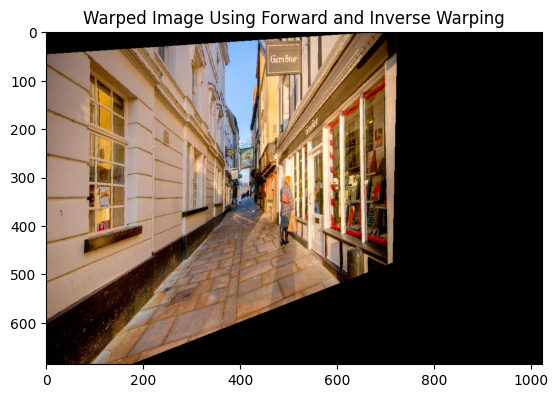

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Load images
im1 = io.imread('http://www.cs.ucf.edu/~gvaca/teaching/CAP4453-Fall2021/homeworks/hw5/img2warp.jpg')
im2 = io.imread('http://www.cs.ucf.edu/~gvaca/teaching/CAP4453-Fall2021/homeworks/hw5/img2warp.jpg')

# Define a reasonable homography matrix for demonstration
# This example matrix will include a slight rotation and translation
H = np.array([
    [1.1, 0.05, -30],  # Slight rotation and shift in x
    [-0.05, 1.1, 50],  # Slight rotation and shift in y
    [0.0005, 0.0001, 1]  # Homogeneous coordinate normalization
])

# Define the limits of the output coordinates
# Assuming you want to maintain the same dimensions as im2
limit_coordinates = (0, im2.shape[1], 0, im2.shape[0])

# Warp im1 to fit into the coordinate space of im2
warped_im1 = warpImage(im1, H, limit_coordinates)

# Display the warped image
plt.imshow(warped_im1)
plt.title('Warped Image Using Forward and Inverse Warping')
plt.show()
